In [1]:
from jwst_SNR import jwst_SNRclass
import numpy as np

from nirspec_sn import *
%matplotlib notebook

## Load in test spectrum
Load in a SN Ia spectrum and set it inside a synphot spectrum class

In [2]:
from astropy.io import ascii

file = './data/snia_10pc_phase=p0.95.dat'
data = ascii.read(file)  
df = data.to_pandas()
snia = S.ArraySpectrum(df['wave'].values,df['flux'].values,waveunits='angstrom',
               fluxunits='flam')
sniaz4 = snia.redshift(4)

## Setup background

In [3]:
from background4jwst import background4jwstclass
background4jwst=background4jwstclass()
    
# set the position for which the background will be calculated. set_position_by_target uses 
# pre-defined positions, set_position can be used to set any position
print(background4jwst.defaulttargets)
background4jwst.set_position_by_target('ElGordo')
# alternatively, background4jwst.set_position('01 02 55.2','-49 14 29.3','ElGordo')
# Get the background from pandeia for this position
# optional parameters: lam, thresh
background4jwst.calc_background()

{'ElGordo': ('01 02 55.2', '-49 14 29.3'), 'EmptyERS': ('03 32 42.397', '-27 42 7.93'), 'NEP-TDF': ('17:22:47.896', '+65:49:21.54'), 'NEP-DF': ('17:40:08.00', '+69:00:08.00'), 'CDF-S': ('03:32:28.0', '−27:48:30')}
Calculating background for position ElGordo (15.730000,-49.241472)


## Calculating exposure times with the main SNR class
This class offers a simplofied quick look into the signal to noise observed by NIRSpec.
In this simple setup, only the prism in the nrsirs2rapid readout mode is avaiable.

In [4]:
# initialise and select instrument
jwst_SNR=jwst_SNRclass(instrument='nirspec')
# assign background
jwst_SNR.set_background4jwst(50,target='EmptyERS')

Initializing pandeia with nirspec, None
no modes
Initializing nirspec fixed_slit
Calculating background for position EmptyERS (53.176654,-27.702203)
### Calculating percentile: 50
day: 187


0

If you have a SN Ia at $z=4$, how long of an exposure time would be needed to reach a desired SNR?
We can calculate this quickly with the Imaging_texp_table. In this case we can input a NIRCam filter(s), and
a magnitude range to normalise the spectrum to, and a target SNR. For this simple calculation of the SNR, we average the signal and noise over a wavelength range centered on the $wave$ input and extendts $\pm spec\_av\_width$ either side. The default for $spec\_av\_width$ is $0.1\mu m$. The signal to noise is then calculated for the number of resolution elements specified, the default is 2, for all gratings. 

If a list of wavelengths is given then the texp for each wavelength will be calculated and added to the table. All valid gratings that overlap with the specified wavelength are selected, unless gratings are specified. The high resolution gratings are currently dissabled.

This process can take a while.

In [6]:
# look at 2 and 3 micron for only prism
jwst_SNR.verbose=2
jwst_SNR.Spec_texp_table([2,3],'f200w',np.arange(24.0,26.0,1),5,gratings='prism',spec=sniaz4)
# write the result table to file 
jwst_SNR.texp.write('NIRSpec_SNR.txt',formatters=jwst_SNR.formatters4texptable)

#############################
#### Filter:f200w, mag 24.000000, grating: prism, for S/N=5 
#############################
#############################
#### Filter f200w, mag 24.00 for S/N=5 
#############################
reference spec


filter:f200w mag:24.00, target exptime:1000.0  ==> SNR=24.55 exptime=992.0
SNR= 24.55 for starting texp= 992.0
texp guess: 111.2
reference spec


filter:f200w mag:24.00, target exptime:291.8  ==> SNR=5.13 exptime=291.8
SNR=  5.13 for next texp= 291.8
SNR=  5.13>5.00 for texp= 291.8, checking the next lower exptime...
#############################
#### Filter:f200w, mag 25.000000, grating: prism, for S/N=5 
#############################
#############################
#### Filter f200w, mag 25.00 for S/N=5 
#############################
reference spec


filter:f200w mag:25.00, target exptime:1000.0  ==> SNR=11.20 exptime=992.0
SNR= 11.20 for starting texp= 992.0
texp guess: 327.4
reference spec


filter:f200w mag:25.00, target exptime:525.2  ==> SNR=5.29 exptime=525.2
SNR=  5.29 for next texp= 525.2
SNR=  5.29>5.00 for texp= 525.2, checking the next lower exptime...
reference spec


filter:f200w mag:25.00, target exptime:291.8  ==> SNR=2.09 exptime=291.8
SNR=  5.29>=5.00 for texp= 525.2, and SNR=2.09<5.00 for texp= 291.8!! SUCCESS!
#############################
#### Filter:f200w, mag 24.000000, grating: prism, for S/N=5 
#############################
#############################
#### Filter f200w, mag 24.00 for S/N=5 
#############################
reference spec


filter:f200w mag:24.00, target exptime:1000.0  ==> SNR=14.32 exptime=992.0
SNR= 14.32 for starting texp= 992.0
texp guess: 233.4
reference spec


filter:f200w mag:24.00, target exptime:291.8  ==> SNR=2.52 exptime=291.8
SNR=  2.52 for next texp= 291.8
SNR=  2.52<5.00 for texp= 291.8, checking the next larger exptime...
reference spec


filter:f200w mag:24.00, target exptime:525.2  ==> SNR=6.51 exptime=525.2
SNR=  6.51>=5.00 for texp= 525.2!! SUCCESS!
#############################
#### Filter:f200w, mag 25.000000, grating: prism, for S/N=5 
#############################
#############################
#### Filter f200w, mag 25.00 for S/N=5 
#############################
reference spec


filter:f200w mag:25.00, target exptime:1000.0  ==> SNR=6.25 exptime=992.0
SNR=  6.25 for starting texp= 992.0
texp guess: 729.5
reference spec


filter:f200w mag:25.00, target exptime:758.6  ==> SNR=4.49 exptime=758.6
SNR=  4.49 for next texp= 758.6
SNR=  4.49<5.00 for texp= 758.6, checking the next larger exptime...
reference spec


filter:f200w mag:25.00, target exptime:992.0  ==> SNR=6.25 exptime=992.0
SNR=  6.25>=5.00 for texp= 992.0!! SUCCESS!


0

In [8]:
# look at 2 and 3 micron for all valid gratings.
jwst_SNR.verbose=2
jwst_SNR.Spec_texp_table([2,3],'f200w',np.arange(24.0,26.0,1),5,spec=sniaz4)
# write the result table to file 
jwst_SNR.texp.write('NIRSpec_SNR.txt',formatters=jwst_SNR.formatters4texptable)

Index(['f200w mag', '3micron_g235m_t', '3micron_g395m_t', '3micron_prism_t'], dtype='object')

# Detailed SNR analysis with NIRSpec_SNR
NIRSpec offers a wide variety of observation modes that can significantly change the SNR. Furthermore the Pandeia system produces simulated data for the entire NIRSpec range, which allows us to examine the SNR for all wavelengths and generate random realisations of NIRSpec spectra as observed by JWST through Pandeia. 

NIRSpec_SNR has additional functions that aid in analysing spectra with Pandeia. If the input spectra is normalised to a distance of 10pc the spectrum can be scalled in flux and wavelength by inputing a desired redshift or luminosity distance. We will go through a few examples here.

In [7]:
nspec = NIRSpec_SNR(spec=snia,grating='prism')
# We want a SN Ia at z=3, since we input a spectrum normalised to d=10pc we can use the distance scaling
nspec.Distance_scale(z=3)
# dust extinction can also be added 
nspec.Redden_spec(av=.03)

The SNR can then be calculated by simply inputing an exposure time 

In [8]:
nspec.Calculate_SNR(exptime=1000)

Calculating background for position EmptyERS (53.176654,-27.702203)
### Calculating percentile: 50
day: 187


We can see the SNR and the calculated flux as follows

<IPython.core.display.Javascript object>


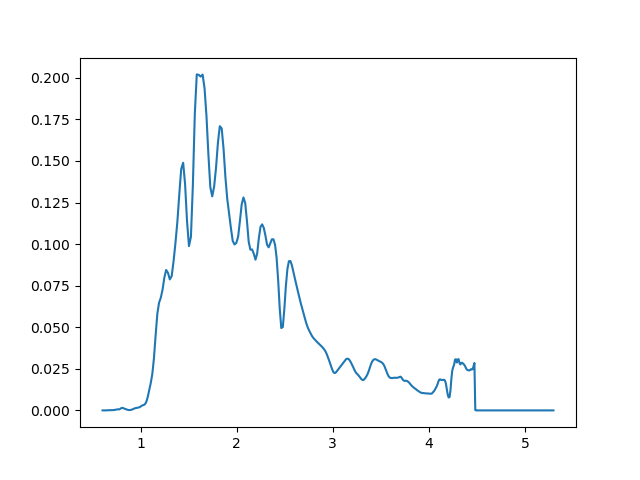

<IPython.core.display.Javascript object>


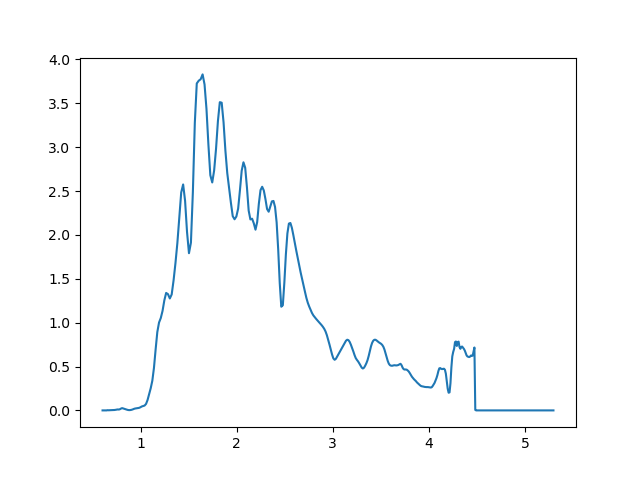

In [9]:
plt.figure()
plt.plot(nspec.calc_wave,nspec.calc_flux)

plt.figure()
plt.plot(nspec.calc_wave,nspec.calc_sn)

# MIRI low resolution spectra

In [7]:
sniaz10 = snia.redshift(10)
jwst_SNR=jwst_SNRclass(instrument='miri',mode='lrsslit')
jwst_SNR.set_background4jwst(50,target='EmptyERS')
jwst_SNR.verbose=2
jwst_SNR.Spec_texp_table(6,'f444w',np.arange(24.0,30.0,1),5,spec=sniaz10)
# write the result table to file 
jwst_SNR.texp.write('MIRI_LRS.txt',formatters=jwst_SNR.formatters4texptable)

Initializing pandeia with miri, lrsslit
Initializing miri lrsslit
Calculating background for position EmptyERS (53.176654,-27.702203)
### Calculating percentile: 50
day: 187
#############################
#### Filter f444w, mag 24.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 24.00 for S/N=5 
#############################
reference spec


filter:f444w mag:24.00, target exptime:1000.0  ==> SNR=37.92 exptime=999.0
SNR= 37.92 for starting texp= 999.0
texp guess: 17.4
reference spec


filter:f444w mag:24.00, target exptime:27.8  ==> SNR=1.65 exptime=27.8
SNR=  1.65 for next texp=  27.8
SNR=  1.65<5.00 for texp=  27.8, checking the next larger exptime...
reference spec


filter:f444w mag:24.00, target exptime:55.5  ==> SNR=2.34 exptime=55.5
SNR=  2.34<5.00 for texp=  55.5, checking the next larger exptime...
reference spec


filter:f444w mag:24.00, target exptime:111.0  ==> SNR=6.92 exptime=111.0
SNR=  6.92>=5.00 for texp= 111.0!! SUCCESS!
#############################
#### Filter f444w, mag 25.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 25.00 for S/N=5 
#############################
reference spec


filter:f444w mag:25.00, target exptime:1000.0  ==> SNR=16.51 exptime=999.0
SNR= 16.51 for starting texp= 999.0
texp guess: 91.6
reference spec


filter:f444w mag:25.00, target exptime:111.0  ==> SNR=2.83 exptime=111.0
SNR=  2.83 for next texp= 111.0
SNR=  2.83<5.00 for texp= 111.0, checking the next larger exptime...
reference spec


filter:f444w mag:25.00, target exptime:166.5  ==> SNR=4.70 exptime=166.5
SNR=  4.70<5.00 for texp= 166.5, checking the next larger exptime...
reference spec


filter:f444w mag:25.00, target exptime:222.0  ==> SNR=6.47 exptime=222.0
SNR=  6.47>=5.00 for texp= 222.0!! SUCCESS!
#############################
#### Filter f444w, mag 26.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 26.00 for S/N=5 
#############################
reference spec


filter:f444w mag:26.00, target exptime:1000.0  ==> SNR=6.85 exptime=999.0
SNR=  6.85 for starting texp= 999.0
texp guess: 533.0
reference spec


filter:f444w mag:26.00, target exptime:555.0  ==> SNR=4.55 exptime=555.0
SNR=  4.55 for next texp= 555.0
SNR=  4.55<5.00 for texp= 555.0, checking the next larger exptime...
reference spec


filter:f444w mag:26.00, target exptime:666.0  ==> SNR=5.23 exptime=666.0
SNR=  5.23>=5.00 for texp= 666.0!! SUCCESS!
#############################
#### Filter f444w, mag 27.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 27.00 for S/N=5 
#############################
reference spec


filter:f444w mag:27.00, target exptime:1000.0  ==> SNR=2.77 exptime=999.0
SNR=  2.77 for starting texp= 999.0
texp guess: 3249.8
reference spec


filter:f444w mag:27.00, target exptime:3330.0  ==> SNR=5.03 exptime=3330.0
SNR=  5.03 for next texp=3330.0
SNR=  5.03>5.00 for texp=3330.0, checking the next lower exptime...
reference spec


filter:f444w mag:27.00, target exptime:3219.0  ==> SNR=4.96 exptime=3219.0
SNR=  5.03>=5.00 for texp=3330.0, and SNR=4.96<5.00 for texp=3219.0!! SUCCESS!
#############################
#### Filter f444w, mag 28.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 28.00 for S/N=5 
#############################
reference spec


filter:f444w mag:28.00, target exptime:1000.0  ==> SNR=1.11 exptime=999.0
SNR=  1.11 for starting texp= 999.0
texp guess: 20219.9
reference spec


filter:f444w mag:28.00, target exptime:9990.0  ==> SNR=3.49 exptime=9990.1
SNR=  3.49 for next texp=9990.1
SNR=  3.49<5.00 for texp=9990.1, checking the next larger exptime...
#############################
#### Filter f444w, mag 29.00 for S/N=5 
#############################
#############################
#### Filter f444w, mag 29.00 for S/N=5 
#############################
reference spec


filter:f444w mag:29.00, target exptime:1000.0  ==> SNR=0.44 exptime=999.0
SNR=  0.44 for starting texp= 999.0
texp guess: 126863.9
reference spec


filter:f444w mag:29.00, target exptime:9990.0  ==> SNR=1.40 exptime=9990.1
SNR=  1.40 for next texp=9990.1
SNR=  1.40<5.00 for texp=9990.1, checking the next larger exptime...


0